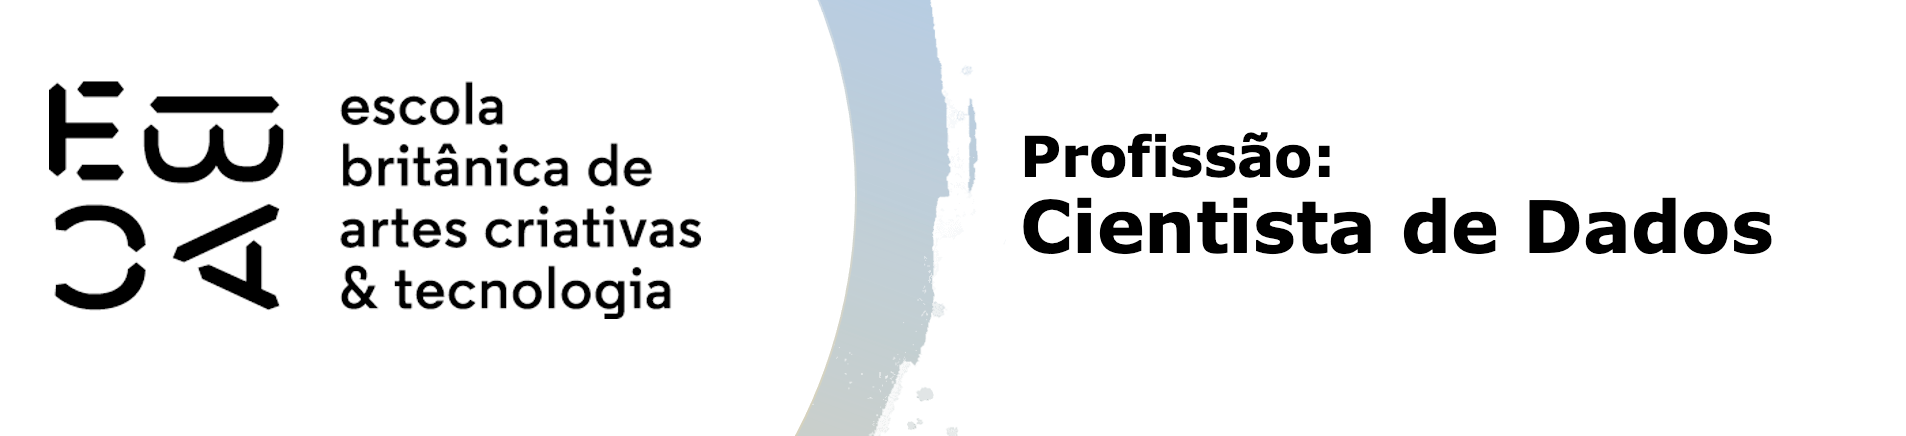

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [6]:
df = pd.read_pickle(r'C:\Users\Joel\Downloads\Data Scientist\Mod 36\base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [8]:
# Converter a coluna 'Data Emissão' para datetime
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'])

# Filtrar os dados de janeiro de 2020 em diante
df_filtered = df[df['Data Emissão'] >= '2020-01-01']

In [12]:
# Criar uma coluna para verificar se o retorno é maior que 0
df_filtered.loc[:, 'Retorno Maior que 0'] = df_filtered['Retorno'] > 0

# Agrupar por categoria e calcular a proporção
proporcao_por_categoria = df_filtered.groupby('categoria')['Retorno Maior que 0'].mean().reset_index()

# Renomear a coluna para melhor compreensão
proporcao_por_categoria.columns = ['Categoria', 'Proporção de Retorno > 0']

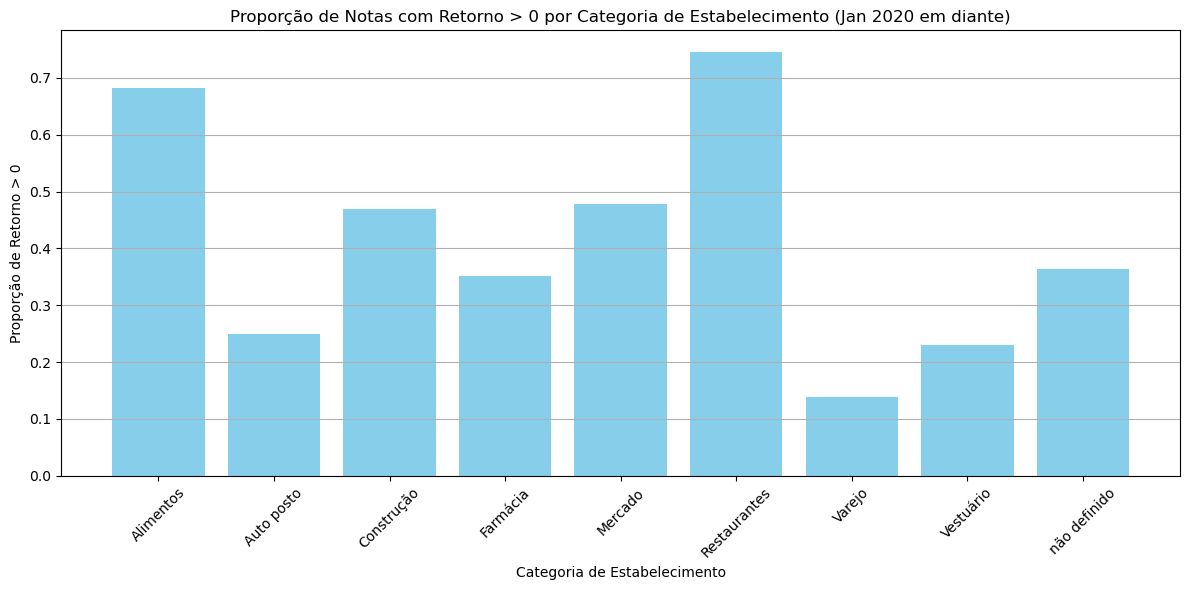

In [14]:
# Plotar a proporção de retorno por categoria
plt.figure(figsize=(12, 6))
plt.bar(proporcao_por_categoria['Categoria'], proporcao_por_categoria['Proporção de Retorno > 0'], color='skyblue')
plt.title('Proporção de Notas com Retorno > 0 por Categoria de Estabelecimento (Jan 2020 em diante)')
plt.xlabel('Categoria de Estabelecimento')
plt.ylabel('Proporção de Retorno > 0')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

      categoria    sum  Não Evento       WOE
0     Alimentos  12868        2092  2.013046
1    Auto posto    271        3418 -2.338269
2    Construção  13811       18425 -0.091820
3      Farmácia   4886       10054 -0.525173
4       Mercado  19808       22887  0.051940
5  Restaurantes  17118       22631 -0.082767
6        Varejo   1035        4869 -1.352064
7     Vestuário   1799        1813  0.188671
8  não definido  13042       16819 -0.057911


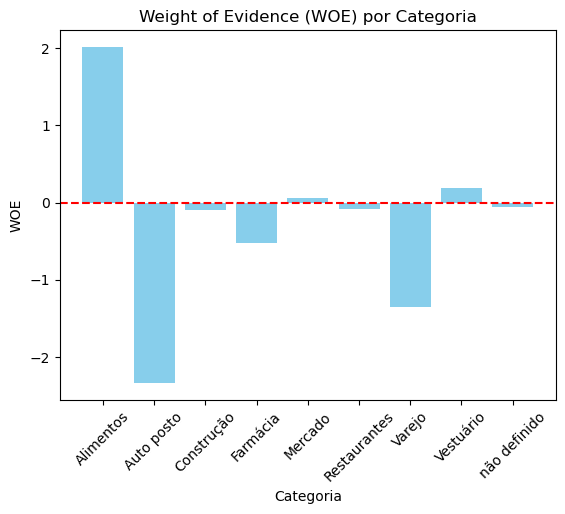

In [24]:
# Criar a coluna de evento
df['Evento'] = df['Retorno'] > 0

# Calcular os totais
total_events = df['Evento'].sum()
total_non_events = len(df) - total_events

# Contar eventos e não eventos por categoria
woe_df = df.groupby('categoria')['Evento'].agg(['sum', 'count']).reset_index()
woe_df['Não Evento'] = woe_df['count'] - woe_df['sum']

# Calcular proporções
woe_df['Proporção de Eventos'] = woe_df['sum'] / total_events
woe_df['Proporção de Não Eventos'] = woe_df['Não Evento'] / total_non_events

# Calcular WOE
woe_df['WOE'] = np.log(woe_df['Proporção de Eventos'] / woe_df['Proporção de Não Eventos'])

# Exibir a tabela de WOE
print(woe_df[['categoria', 'sum', 'Não Evento', 'WOE']])

# Gráfico de WOE
plt.bar(woe_df['categoria'], woe_df['WOE'], color='skyblue')
plt.title('Weight of Evidence (WOE) por Categoria')
plt.xlabel('Categoria')
plt.ylabel('WOE')
plt.axhline(0, color='red', linestyle='--')  # Linha de referência em 0
# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)
plt.show()

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [28]:
# Calcular o Information Value (IV)
woe_df['IV_Parte'] = (woe_df['Proporção de Eventos'] - woe_df['Proporção de Não Eventos']) * woe_df['WOE']
IV = woe_df['IV_Parte'].sum()

# Exibir o resultado
print("Information Value (IV):", IV)

# Exibir a tabela de WOE
print(woe_df[['categoria', 'sum', 'Não Evento', 'WOE', 'IV_Parte']])

Information Value (IV): 0.40831279222730105
      categoria    sum  Não Evento       WOE  IV_Parte
0     Alimentos  12868        2092  2.013046  0.265172
1    Auto posto    271        3418 -2.338269  0.070101
2    Construção  13811       18425 -0.091820  0.001441
3      Farmácia   4886       10054 -0.525173  0.020942
4       Mercado  19808       22887  0.051940  0.000615
5  Restaurantes  17118       22631 -0.082767  0.001444
6        Varejo   1035        4869 -1.352064  0.047376
7     Vestuário   1799        1813  0.188671  0.000690
8  não definido  13042       16819 -0.057911  0.000532


## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


<font color='red'>**A categoria Alimentos tem a capacidade preditiva moderada e as demais categorias tem pouca ou nenhuma capacidade preditiva.**</font>